# Kmean Clustering

In [ ]:
import warnings
warnings.filterwarnings('ignore')

import datetime
import numpy as np
import pandas as pd
import seaborn as sns
# import pandasql as ps
import matplotlib.pyplot as plt
%matplotlib inline
pd.set_option('display.max_columns', None)
pd.set_option('display.max_rows', None)

print('numpy version : ',np.__version__)
print('pandas version : ',pd.__version__)
print('seaborn version : ',sns.__version__)

from mpl_toolkits.mplot3d import Axes3D

from sklearn.cluster import KMeans
from sklearn.decomposition import PCA
from sklearn.metrics import silhouette_score
from sklearn.preprocessing import StandardScaler, MinMaxScaler

numpy version :  1.26.4
pandas version :  2.1.1
seaborn version :  0.13.2


In [ ]:
data = pd.read_csv('flight.csv', encoding = 'ISO-8859-1' )

In [ ]:
data.head(5)

,MEMBER_NO,FFP_DATE,FIRST_FLIGHT_DATE,GENDER,FFP_TIER,WORK_CITY,WORK_PROVINCE,WORK_COUNTRY,AGE,LOAD_TIME,FLIGHT_COUNT,BP_SUM,SUM_YR_1,SUM_YR_2,SEG_KM_SUM,LAST_FLIGHT_DATE,LAST_TO_END,AVG_INTERVAL,MAX_INTERVAL,EXCHANGE_COUNT,avg_discount,Points_Sum,Point_NotFlight
0,54993,11/2/2006,12/24/2008,Male,6,.,beijing,CN,31.0,3/31/2014,210,505308,239560.0,234188.0,580717,3/31/2014,1,3.483254,18,34,0.961639,619760,50
1,28065,2/19/2007,8/3/2007,Male,6,NaN,beijing,CN,42.0,3/31/2014,140,362480,171483.0,167434.0,293678,3/25/2014,7,5.194245,17,29,1.252314,415768,33
2,55106,2/1/2007,8/30/2007,Male,6,.,beijing,CN,40.0,3/31/2014,135,351159,163618.0,164982.0,283712,3/21/2014,11,5.298507,18,20,1.254676,406361,26
3,21189,8/22/2008,8/23/2008,Male,5,Los Angeles,CA,US,64.0,3/31/2014,23,337314,116350.0,125500.0,281336,12/26/2013,97,27.863636,73,11,1.090870,372204,12
4,39546,4/10/2009,4/15/2009,Male,6,guiyang,guizhou,CN,48.0,3/31/2014,152,273844,124560.0,130702.0,309928,3/27/2014,5,4.788079,47,27,0.970658,338813,39


In [ ]:
data.shape

(62988, 23)

In [ ]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 62988 entries, 0 to 62987
Data columns (total 23 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   MEMBER_NO          62988 non-null  int64  
 1   FFP_DATE           62988 non-null  object 
 2   FIRST_FLIGHT_DATE  62988 non-null  object 
 3   GENDER             62985 non-null  object 
 4   FFP_TIER           62988 non-null  int64  
 5   WORK_CITY          60719 non-null  object 
 6   WORK_PROVINCE      59740 non-null  object 
 7   WORK_COUNTRY       62962 non-null  object 
 8   AGE                62568 non-null  float64
 9   LOAD_TIME          62988 non-null  object 
 10  FLIGHT_COUNT       62988 non-null  int64  
 11  BP_SUM             62988 non-null  int64  
 12  SUM_YR_1           62437 non-null  float64
 13  SUM_YR_2           62850 non-null  float64
 14  SEG_KM_SUM         62988 non-null  int64  
 15  LAST_FLIGHT_DATE   62988 non-null  object 
 16  LAST_TO_END        629

| **Column Name**      | **Description**                                                                 |
|-----------------------|---------------------------------------------------------------------------------|
| `MEMBER_NO`           | ID Member                                                                      |
| `FFP_DATE`            | Frequent Flyer Program Join Date                                               |
| `FIRST_FLIGHT_DATE`   | Tanggal Penerbangan Pertama                                                    |
| `GENDER`              | Jenis Kelamin                                                                 |
| `FFP_TIER`            | Tier dari Frequent Flyer Program                                               |
| `WORK_CITY`           | Kota Asal                                                                      |
| `WORK_PROVINCE`       | Provinsi Asal                                                                  |
| `WORK_COUNTRY`        | Negara Asal                                                                    |
| `AGE`                 | Umur Customer                                                                 |
| `LOAD_TIME`           | Tanggal data diambil                                                          |
| `FLIGHT_COUNT`        | Jumlah penerbangan Customer                                                    |
| `BP_SUM`              | Rencana Perjalanan                                                            |
| `SUM_YR_1`            | Total credit/point di tahun pertama                                            |
| `SUM_YR_2`            | Total credit/point di tahun kedua                                              |
| `SEG_KM_SUM`          | Total jarak (km) penerbangan yang sudah dilakukan                              |
| `LAST_FLIGHT_DATE`    | Tanggal penerbangan terakhir                                                   |
| `LAST_TO_END`         | Jarak waktu penerbangan terakhir ke pesanan penerbangan paling akhir           |
| `AVG_INTERVAL`        | Rata-rata jarak waktu                                                         |
| `MAX_INTERVAL`        | Maksimal jarak waktu                                                          |
| `EXCHANGE_COUNT`      | Jumlah penukaran                                                              |
| `avg_discount`        | Rata-rata diskon yang didapat customer                                         |
| `Points_Sum`          | Jumlah poin yang didapat customer                                              |
| `Point_NotFlight`     | Poin yang tidak digunakan oleh members                                         |


## Data Preprocesing
Student mampu melakukan data cleaning, fitur selection, dll


In [ ]:
data[data.duplicated()==True]

,MEMBER_NO,FFP_DATE,FIRST_FLIGHT_DATE,GENDER,FFP_TIER,WORK_CITY,WORK_PROVINCE,WORK_COUNTRY,AGE,LOAD_TIME,FLIGHT_COUNT,BP_SUM,SUM_YR_1,SUM_YR_2,SEG_KM_SUM,LAST_FLIGHT_DATE,LAST_TO_END,AVG_INTERVAL,MAX_INTERVAL,EXCHANGE_COUNT,avg_discount,Points_Sum,Point_NotFlight


In [ ]:
data.dtypes

MEMBER_NO              int64
FFP_DATE              object
FIRST_FLIGHT_DATE     object
GENDER                object
FFP_TIER               int64
WORK_CITY             object
WORK_PROVINCE         object
WORK_COUNTRY          object
AGE                  float64
LOAD_TIME             object
FLIGHT_COUNT           int64
BP_SUM                 int64
SUM_YR_1             float64
SUM_YR_2             float64
SEG_KM_SUM             int64
LAST_FLIGHT_DATE      object
LAST_TO_END            int64
AVG_INTERVAL         float64
MAX_INTERVAL           int64
EXCHANGE_COUNT         int64
avg_discount         float64
Points_Sum             int64
Point_NotFlight        int64
dtype: object

- FFP_DATE convert to datetime
- FIRST_FLIGHT_DATE convert to datetime
- LOAD_TIME convert to datetime
- LAST_FLIGHT_DATE convert to datetime

In [ ]:
data['FFP_DATE'] = pd.to_datetime(data['FFP_DATE'], errors='coerce')
data['FIRST_FLIGHT_DATE'] = pd.to_datetime(data['FIRST_FLIGHT_DATE'], errors='coerce')
data['LOAD_TIME'] = pd.to_datetime(data['LOAD_TIME'], errors='coerce')
data['LAST_FLIGHT_DATE'] = pd.to_datetime(data['LAST_FLIGHT_DATE'], errors='coerce')

In [ ]:
data.isnull().sum()

MEMBER_NO               0
FFP_DATE                0
FIRST_FLIGHT_DATE       0
GENDER                  3
FFP_TIER                0
WORK_CITY            2269
WORK_PROVINCE        3248
WORK_COUNTRY           26
AGE                   420
LOAD_TIME               0
FLIGHT_COUNT            0
BP_SUM                  0
SUM_YR_1              551
SUM_YR_2              138
SEG_KM_SUM              0
LAST_FLIGHT_DATE      421
LAST_TO_END             0
AVG_INTERVAL            0
MAX_INTERVAL            0
EXCHANGE_COUNT          0
avg_discount            0
Points_Sum              0
Point_NotFlight         0
dtype: int64

In [ ]:
data = data[data['SUM_YR_1'].notnull()]
data = data[data['SUM_YR_2'].notnull()]

In [ ]:
data.isnull().sum()

MEMBER_NO               0
FFP_DATE                0
FIRST_FLIGHT_DATE       0
GENDER                  3
FFP_TIER                0
WORK_CITY            2256
WORK_PROVINCE        3224
WORK_COUNTRY           26
AGE                   415
LOAD_TIME               0
FLIGHT_COUNT            0
BP_SUM                  0
SUM_YR_1                0
SUM_YR_2                0
SEG_KM_SUM              0
LAST_FLIGHT_DATE      421
LAST_TO_END             0
AVG_INTERVAL            0
MAX_INTERVAL            0
EXCHANGE_COUNT          0
avg_discount            0
Points_Sum              0
Point_NotFlight         0
dtype: int64

In [ ]:
data = data[['LOAD_TIME', 'FFP_DATE', 'LAST_TO_END', 'FLIGHT_COUNT','SEG_KM_SUM','avg_discount']]

In [ ]:
data.head()

,LOAD_TIME,FFP_DATE,LAST_TO_END,FLIGHT_COUNT,SEG_KM_SUM,avg_discount
0,2014-03-31,2006-11-02,1,210,580717,0.961639
1,2014-03-31,2007-02-19,7,140,293678,1.252314
2,2014-03-31,2007-02-01,11,135,283712,1.254676
3,2014-03-31,2008-08-22,97,23,281336,1.090870
4,2014-03-31,2009-04-10,5,152,309928,0.970658


### LRFMC

#### Length

In [ ]:
def interval_time(dd):
    return dd.days

data['length']=np.abs(data['LOAD_TIME']-data['FFP_DATE'])
data['length']=data['length'].apply(interval_time)

In [ ]:
data[['length']].head()

,length
0,2706
1,2597
2,2615
3,2047
4,1816


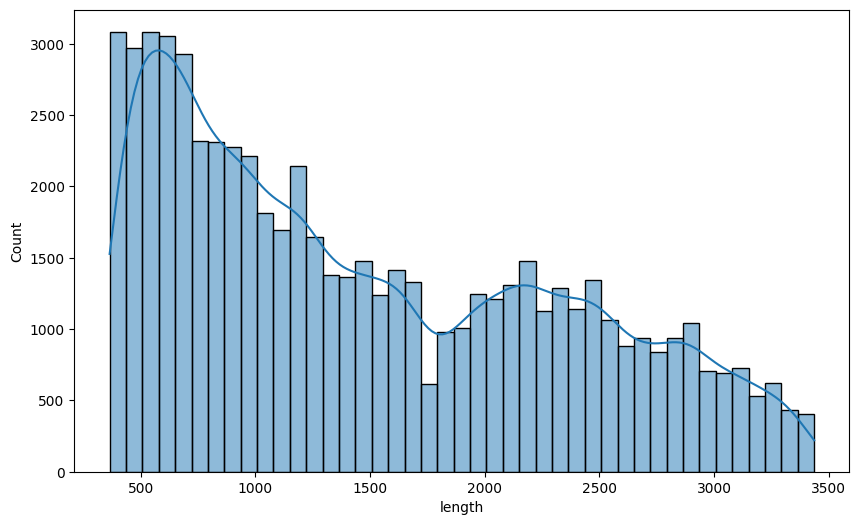

In [ ]:
f, (ax_hist) = plt.subplots(1, figsize=(10,6))
sns.histplot(data['length'], kde=True, ax=ax_hist)
plt.show()

#### Recency

In [ ]:
data.rename(columns={'LAST_TO_END': 'recency'}, inplace=True)

In [ ]:
data[['length', 'recency']].head()

,length,recency
0,2706,1
1,2597,7
2,2615,11
3,2047,97
4,1816,5


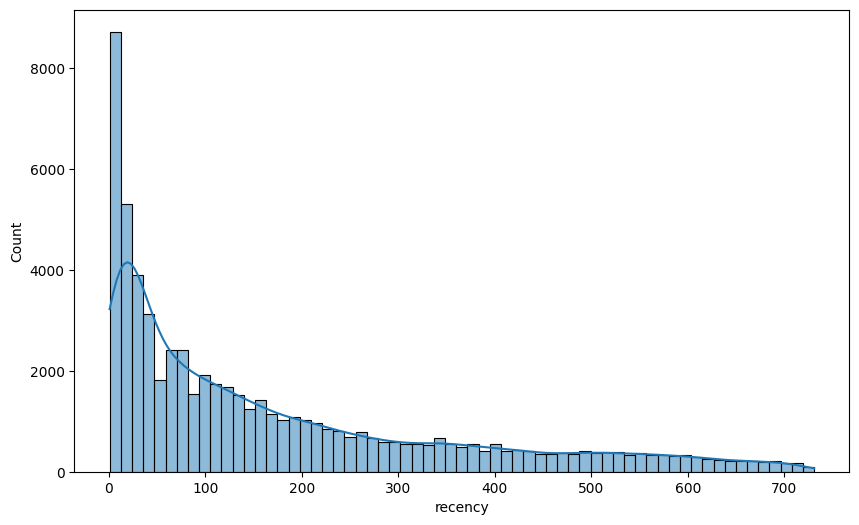

In [ ]:
f, (ax_hist) = plt.subplots(1, figsize=(10,6))
sns.histplot(data['recency'], kde=True, ax=ax_hist)
plt.show()

#### Frequency

In [ ]:
data.rename(columns={'FLIGHT_COUNT': 'frequency'}, inplace=True)

In [ ]:
data[['length', 'recency', 'frequency']].head()


,length,recency,frequency
0,2706,1,210
1,2597,7,140
2,2615,11,135
3,2047,97,23
4,1816,5,152


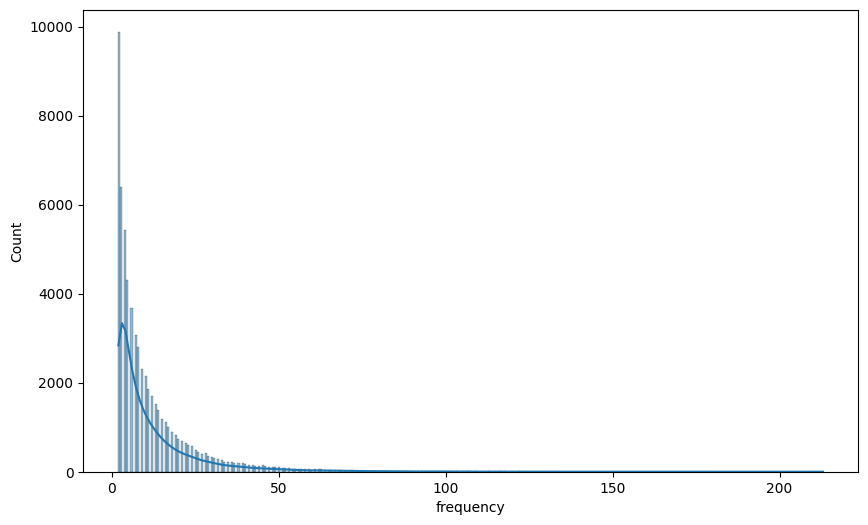

In [ ]:
f, (ax_hist) = plt.subplots(1, figsize=(10,6))
sns.histplot(data['frequency'], kde=True, ax=ax_hist)
plt.show()

#### Monetary

In [ ]:
data.rename(columns={'SEG_KM_SUM': 'monetary'}, inplace=True)

In [ ]:
data[['length', 'recency', 'frequency', 'monetary']].head()


,length,recency,frequency,monetary
0,2706,1,210,580717
1,2597,7,140,293678
2,2615,11,135,283712
3,2047,97,23,281336
4,1816,5,152,309928


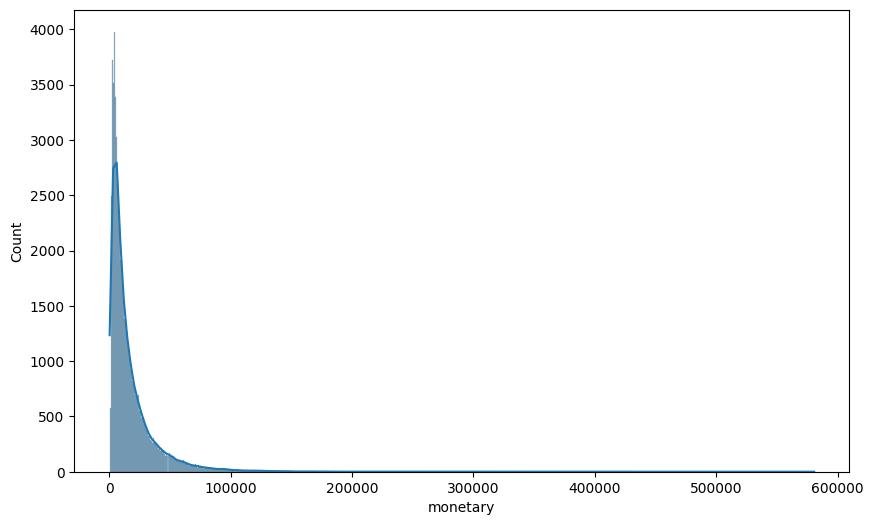

In [ ]:
f, (ax_hist) = plt.subplots(1, figsize=(10,6))
sns.histplot(data['monetary'], kde=True, ax=ax_hist)
plt.show()

#### Coeficient

In [ ]:
data.rename(columns={'avg_discount': 'coeficient'}, inplace=True)

In [ ]:
data[['length', 'recency', 'frequency', 'monetary', 'coeficient']].head()


,length,recency,frequency,monetary,coeficient
0,2706,1,210,580717,0.961639
1,2597,7,140,293678,1.252314
2,2615,11,135,283712,1.254676
3,2047,97,23,281336,1.090870
4,1816,5,152,309928,0.970658


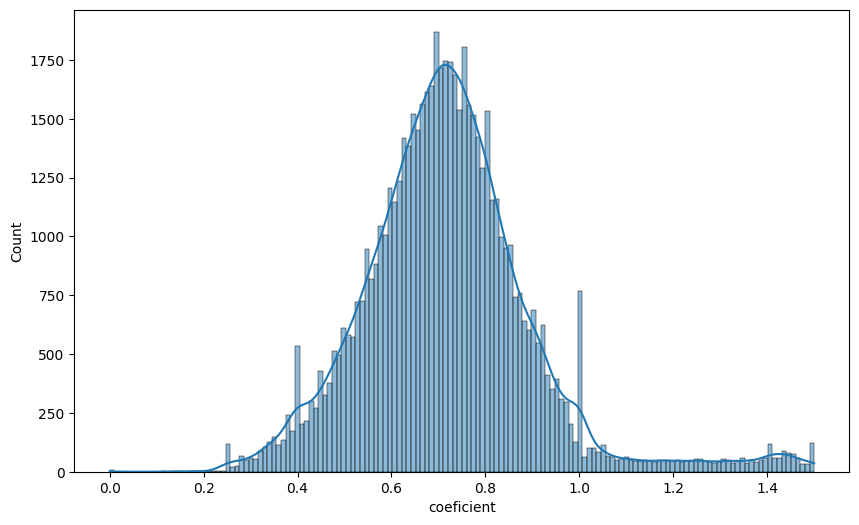

In [ ]:
f, (ax_hist) = plt.subplots(1, figsize=(10,6))
sns.histplot(data['coeficient'], kde=True, ax=ax_hist)
plt.show()

In [ ]:
df_lrfmc = data[['length', 'recency', 'frequency', 'monetary', 'coeficient']]

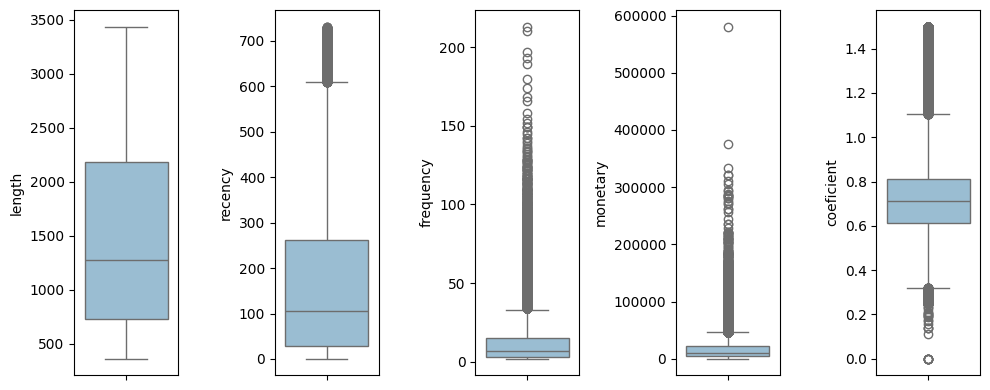

In [ ]:
# Asumsi df_lrfmc adalah DataFrame dengan kolom yang relevan
plt.figure(figsize=(10, 4))

# Looping untuk menggambar boxplot untuk setiap kolom dalam df_lrfmc
for i, column in enumerate(df_lrfmc.columns):
    plt.subplot(1, len(df_lrfmc.columns), i+1)
    sns.boxplot(y=df_lrfmc[column], color='#91bfdb', orient='v')
    plt.tight_layout()

# Menampilkan plot
plt.show()

In [ ]:
# Menampilkan jumlah baris sebelum filter outlier
print(f'Jumlah baris sebelum memfilter outlier: {len(df_lrfmc)}')

# Memfilter outlier menggunakan IQR
fil_ent = np.array([True] * len(df_lrfmc))  # Inisialisasi filter
for col in df_lrfmc.columns:  # Iterasi melalui setiap kolom
    Q1 = df_lrfmc[col].quantile(0.25)  # Quartile pertama
    Q3 = df_lrfmc[col].quantile(0.75)  # Quartile ketiga
    IQR = Q3 - Q1  # Menghitung IQR
    low_limit = Q1 - (IQR * 1.5)  # Batas bawah untuk outlier
    high_limit = Q3 + (IQR * 1.5)  # Batas atas untuk outlier

    # Memperbarui filter untuk kolom saat ini
    fil_ent = ((df_lrfmc[col] >= low_limit) & (df_lrfmc[col] <= high_limit)) & fil_ent

# Mengaplikasikan filter dan mereset index
df_lrfmc = df_lrfmc[fil_ent].reset_index(drop=True)

# Menampilkan jumlah baris setelah filter outlier
print('Jumlah baris setelah memfilter outlier', len(df_lrfmc))

Jumlah baris sebelum memfilter outlier: 62299
Jumlah baris setelah memfilter outlier 52244


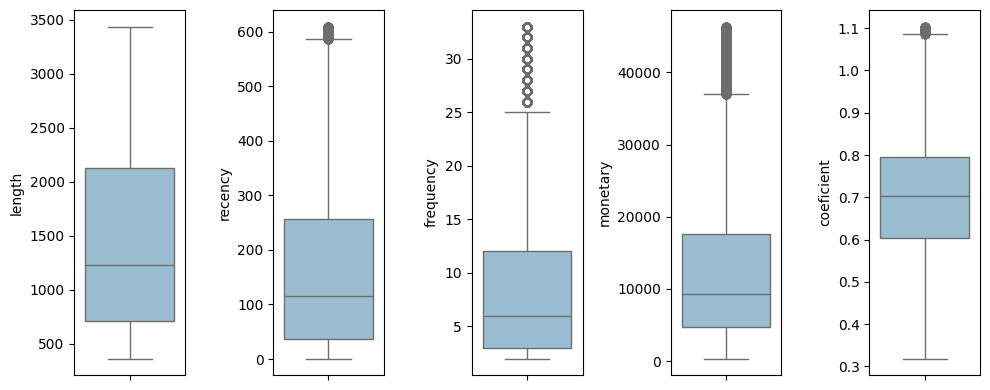

In [ ]:
plt.figure(figsize=(10, 4))

for i, column in enumerate(df_lrfmc.columns):
    plt.subplot(1, len(df_lrfmc.columns), i+1)
    sns.boxplot(y=df_lrfmc[column], color='#91bfdb', orient='v')
    plt.tight_layout()

plt.show()

In [ ]:
df_lrfmc.head()

,length,recency,frequency,monetary,coeficient
0,2440,16,28,46152,1.098501
1,2701,16,29,43790,1.099567
2,2172,108,8,45604,1.042694
3,1346,7,29,44033,1.059304
4,2342,436,6,45460,1.019714


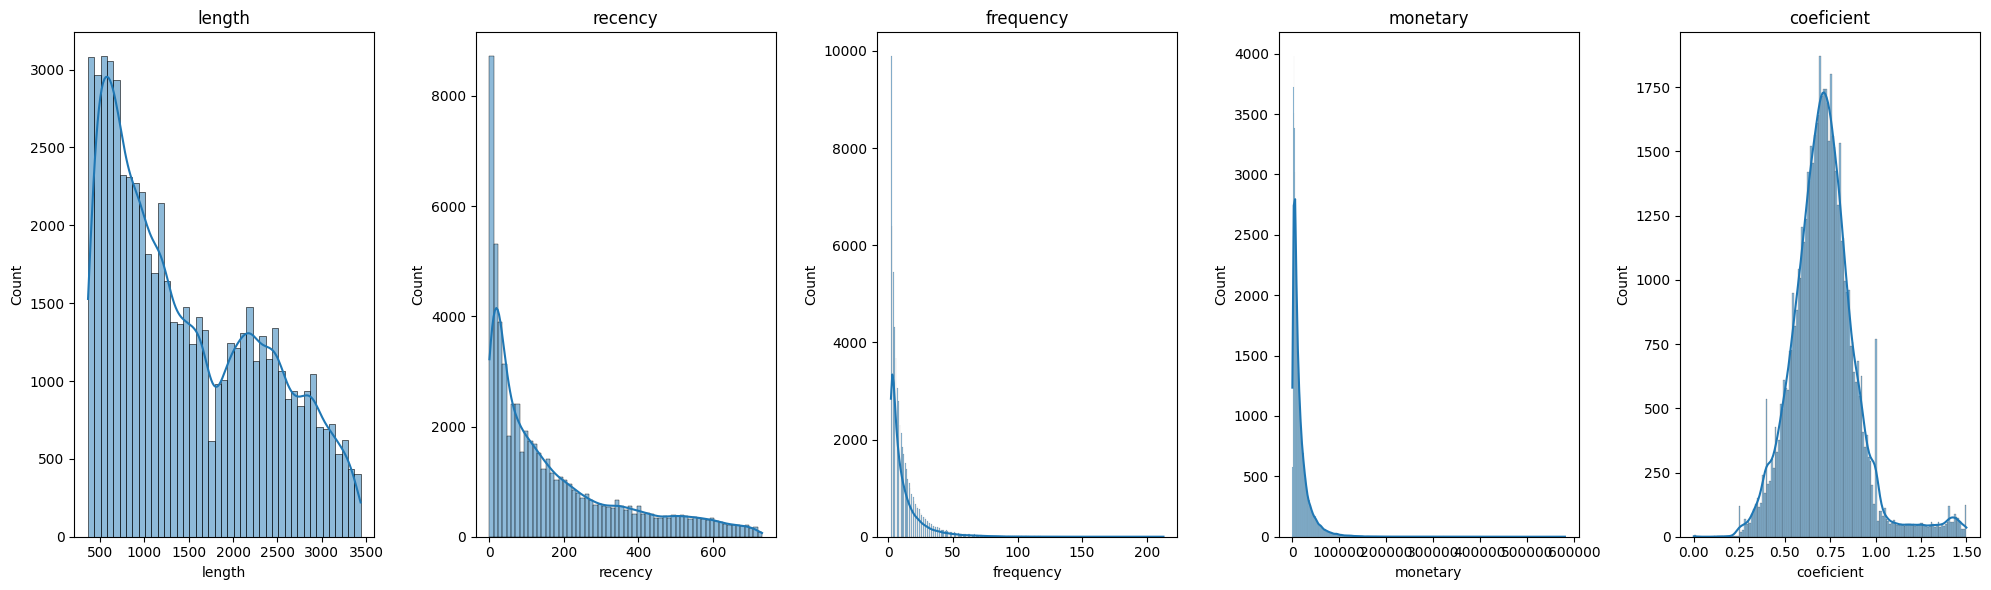

In [ ]:
# Membuat figure dan axes dengan 1 baris dan 5 kolom untuk 5 grafik
f, axes = plt.subplots(1, 5, figsize=(20, 6))

# Loop untuk membuat histogram dan KDE untuk setiap kolom pada axes yang berbeda
for i, col in enumerate(df_lrfmc):
    sns.histplot(data[col], kde=True, ax=axes[i])  # Membuat histogram dengan KDE
    axes[i].set_title(col)  # Menambahkan judul untuk setiap sub-plot

# Menata layout agar tidak tumpang tindih
plt.tight_layout()

# Menampilkan plot
plt.show()

In [ ]:
# df_lrfmc['recency_percentile'] = df_lrfmc['length'].rank(pct=True, ascending=False)
# df_lrfmc['recency_percentile'] = df_lrfmc['recency'].rank(pct=True, ascending=False)
# df_lrfmc['frequency_percentile'] = df_lrfmc['frequency'].rank(pct=True, ascending=True)
# df_lrfmc['monetary_percentile'] = df_lrfmc['monetary'].rank(pct=True, ascending=True)
# df_lrfmc['recency_percentile'] = df_lrfmc['coeficient'].rank(pct=True, ascending=False)

In [ ]:
df_lrfmc=df_lrfmc
scale = MinMaxScaler()
kolom_all = [x for x in df_lrfmc.columns]
for kolom in kolom_all:
  df_lrfmc[kolom] = scale.fit_transform(np.array(df_lrfmc[kolom]).reshape(-1,1))

## Clustering
Student mampu melakukan clustering dengan unsupervised learning


In [ ]:
inertia = []
k_values = range(2,11)

for k in k_values:
    kmeans = KMeans(n_clusters=k, random_state=123)
    kmeans.fit(df_lrfmc)
    inertia.append(kmeans.inertia_)

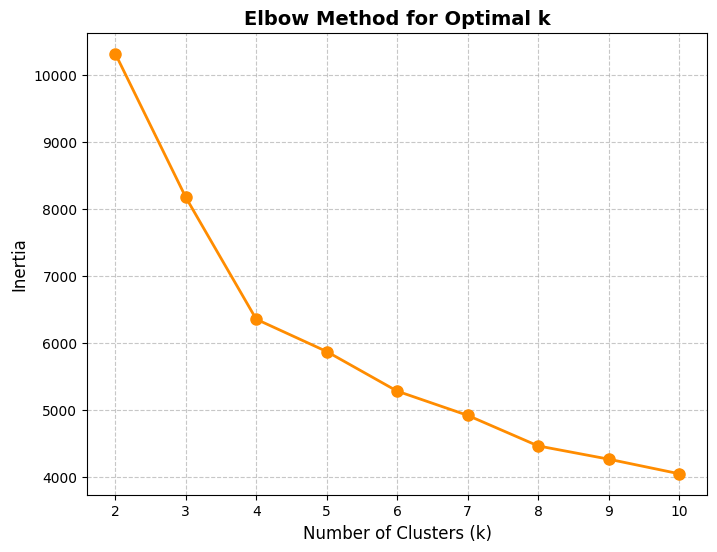

In [ ]:
plt.figure(figsize=(8, 6))
plt.plot(k_values, inertia, marker='o', linestyle='-', color='darkorange', markersize=8, linewidth=2)
plt.title('Elbow Method for Optimal k', fontsize=14, fontweight='bold')
plt.xlabel('Number of Clusters (k)', fontsize=12)
plt.ylabel('Inertia', fontsize=12)
plt.xticks(k_values, fontsize=10)
plt.grid(True, linestyle='--', alpha=0.7)
plt.show()

In [ ]:
range_n_clusters = list(range(2,11))
print(range_n_clusters)

[2, 3, 4, 5, 6, 7, 8, 9, 10]


In [ ]:
arr_silhouette_score_euclidean = []
for i in range_n_clusters:
    kmeans = KMeans(n_clusters=i).fit(df_lrfmc)
    preds = kmeans.predict(df_lrfmc)

    score_euclidean = silhouette_score(df_lrfmc, preds, metric='euclidean')
    arr_silhouette_score_euclidean.append(score_euclidean)

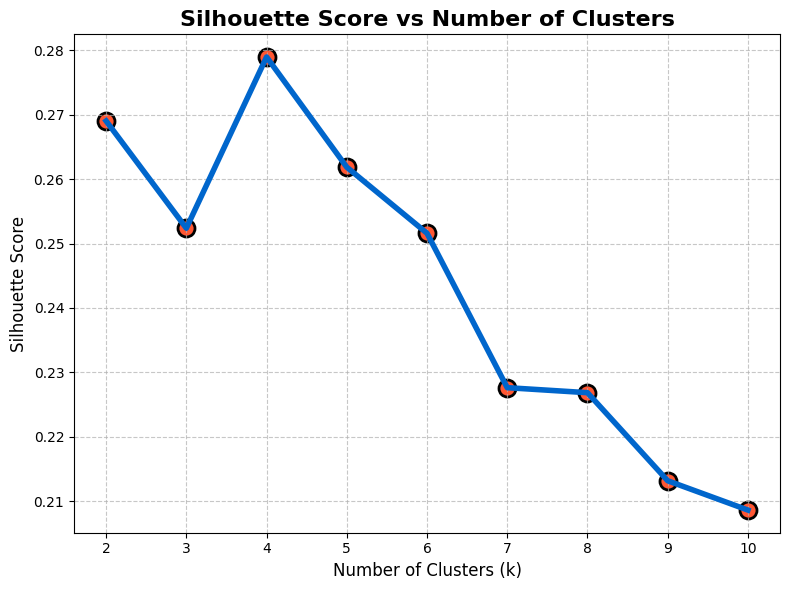

In [ ]:
fig, ax = plt.subplots(figsize=(8, 6))
sns.lineplot(x=range(2, 11), y=arr_silhouette_score_euclidean, color='#0066CC', linewidth=4, ax=ax)
sns.scatterplot(x=range(2, 11), y=arr_silhouette_score_euclidean, s=150, color='#FF5733', edgecolor='black', linewidth=2, ax=ax)
ax.set_title('Silhouette Score vs Number of Clusters', fontsize=16, fontweight='bold')
ax.set_xlabel('Number of Clusters (k)', fontsize=12)
ax.set_ylabel('Silhouette Score', fontsize=12)
ax.grid(True, linestyle='--', alpha=0.7)
plt.tight_layout()
plt.show()

Best Clusteri

In [ ]:
from sklearn.cluster import KMeans

kmeans = KMeans(n_clusters=4, random_state = 123)
kmeans.fit(df_lrfmc.values)
df_lrfmc['cluster'] = kmeans.labels_

In [ ]:
df_lrfmc.head()

,length,recency,frequency,monetary,coeficient,cluster
0,0.675456,0.024671,0.838710,0.995954,0.993304,1
1,0.760417,0.024671,0.870968,0.944573,0.994662,1
2,0.588216,0.175987,0.193548,0.984033,0.922206,1
3,0.319336,0.009868,0.870968,0.949859,0.943367,1
4,0.643555,0.715461,0.129032,0.980901,0.892930,1


## Data visualiasi
Student mampu menampilkan hasil clustering atau hasil

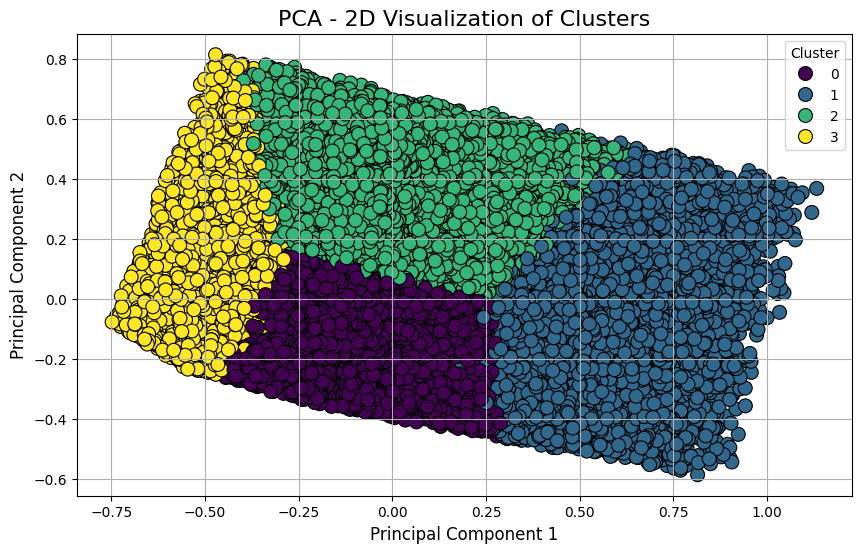

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.decomposition import PCA
import seaborn as sns


pca = PCA(n_components=2)
pcs = pca.fit_transform(df_lrfmc.drop(columns='cluster'))
df_pca = pd.DataFrame(data=pcs, columns=['PC 1', 'PC 2'])
df_pca['cluster'] = df_lrfmc['cluster']

plt.figure(figsize=(10, 6))
sns.scatterplot(x='PC 1', y='PC 2', hue='cluster', data=df_pca, palette='viridis', s=100, edgecolor='black')

plt.title('PCA - 2D Visualization of Clusters', fontsize=16)
plt.xlabel('Principal Component 1', fontsize=12)
plt.ylabel('Principal Component 2', fontsize=12)

plt.legend(title='Cluster')
plt.grid(True)
plt.show()


In [ ]:
cluster_count = df_lrfmc['cluster'].value_counts().reset_index()
cluster_count.columns = ['cluster', 'count']
cluster_count['percentage (%)'] = round((cluster_count['count']/len(df_lrfmc))*100,2)
cluster_count = cluster_count.sort_values(by=['cluster']).reset_index(drop=True)
cluster_count

,cluster,count,percentage (%)
0,0,19286,36.92
1,1,9977,19.10
2,2,12299,23.54
3,3,10682,20.45


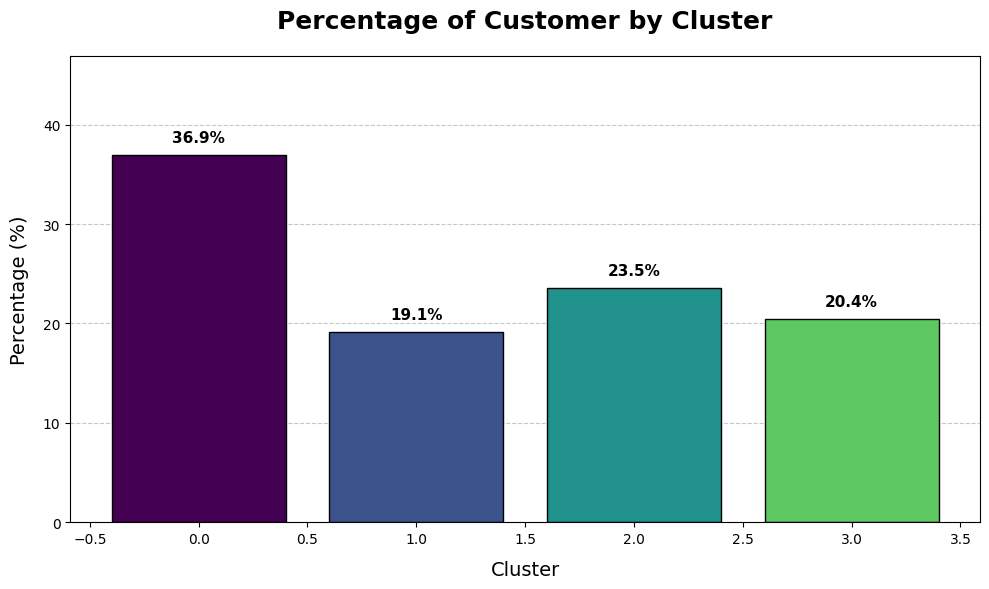

In [ ]:
from matplotlib.cm import viridis
fig, ax = plt.subplots(figsize=(10, 6))

viridis_colors = [viridis(i / cluster_count['cluster'].nunique()) for i in range(cluster_count['cluster'].nunique())]

bars = ax.bar(x=cluster_count['cluster'], height=cluster_count['percentage (%)'], color=viridis_colors, edgecolor='black', linewidth=1)

for bar in bars:
    height = bar.get_height()
    label_x_pos = bar.get_x() + bar.get_width() / 2
    ax.text(label_x_pos, height + 1, s=f'{height:.1f}%', ha='center', va='bottom', fontsize=11, fontweight='bold')

ax.set_title('Percentage of Customer by Cluster', fontsize=18, fontweight='bold', pad=20)
ax.set_xlabel('Cluster', fontsize=14, labelpad=10)
ax.set_ylabel('Percentage (%)', fontsize=14, labelpad=10)

ax.yaxis.grid(True, linestyle='--', alpha=0.7)
ax.set_axisbelow(True)

ax.set_ylim(0, cluster_count['percentage (%)'].max() + 10)

plt.tight_layout()

plt.show()

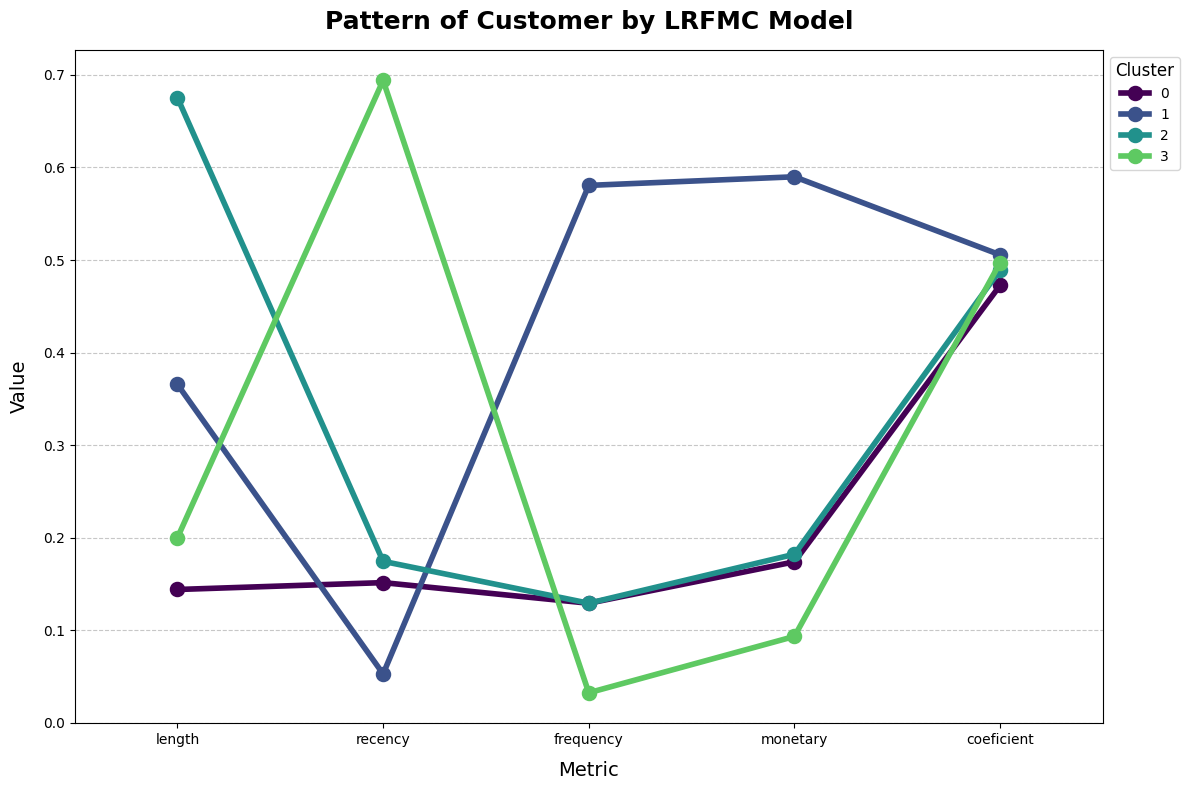

In [ ]:
cluster_med = df_lrfmc.groupby('cluster').median().reset_index()
df_melt = pd.melt(cluster_med, id_vars='cluster', value_vars=['length', 'recency', 'frequency', 'monetary', 'coeficient'],
                  var_name='Metric', value_name='Value')

unique_clusters = df_melt['cluster'].nunique()
viridis_colors = [viridis(i / unique_clusters) for i in range(unique_clusters)]

plt.figure(figsize=(12, 8))
sns.pointplot(data=df_melt, x='Metric', y='Value', hue='cluster', palette=viridis_colors, markers="o", scale=1.5)

plt.title('Pattern of Customer by LRFMC Model', fontsize=18, fontweight='bold', pad=15)
plt.xlabel('Metric', fontsize=14, labelpad=10)
plt.ylabel('Value', fontsize=14, labelpad=10)

plt.grid(axis='y', linestyle='--', alpha=0.7)

plt.legend(title='Cluster', title_fontsize=12, fontsize=10, loc='upper left', bbox_to_anchor=(1, 1))

plt.tight_layout()

plt.show()


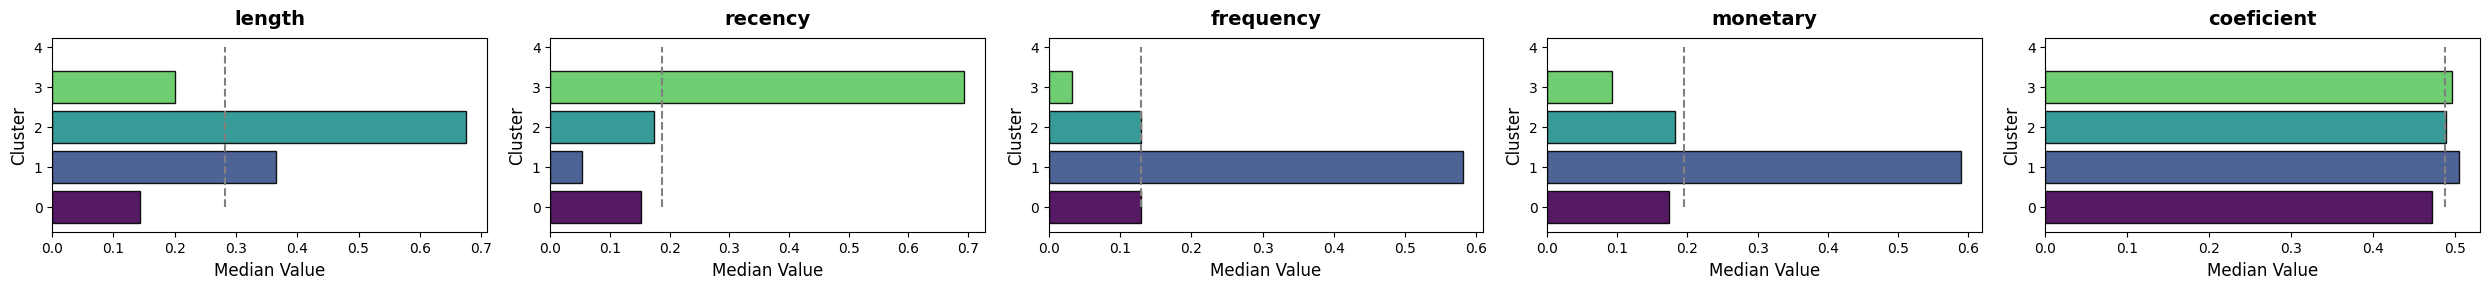

In [ ]:
unique_clusters = df_lrfmc['cluster'].nunique()
colors = [viridis(i / unique_clusters) for i in range(unique_clusters)]

LRFMC = ['length', 'recency', 'frequency', 'monetary', 'coeficient']

def dist_list(lst):
    plt.figure(figsize=[len(lst) * 5, 3])
    i = 1
    for col in lst:
        ax = plt.subplot(1, len(lst), i)

        ax.vlines(df_lrfmc[col].median(), ymin=0, ymax=unique_clusters, color='grey', linestyle='--', linewidth=1.5)

        g = df_lrfmc.groupby('cluster')
        x = g[col].median().index
        y = g[col].median().values

        ax.barh(x, y, color=colors, edgecolor='black', alpha=0.9)

        plt.title(col, fontsize=14, fontweight='bold', pad=10)
        plt.xlabel('Median Value', fontsize=12)
        plt.ylabel('Cluster', fontsize=12)
        i += 1

    plt.tight_layout()

dist_list(LRFMC)

## Data insight
student mampu menganalisis hasil clustering


1. Segmen High Value (Hijau - Cluster 3)
- Recency sangat tinggi (paling aktif baru-baru ini)
- Coefficient sangat tinggi
- Length menengah
- Monetary rendah-menengah
- Frequency rendah
Karakteristik: Pelanggan premium yang sangat loyal, meski tidak terlalu sering terbang tapi memiliki nilai dan kesetiaan tinggi.

2. Segmen Long Term (Tosca - Cluster 2)
- Length paling tinggi
- Recency menengah
- Coefficient menengah
- Frequency dan Monetary rendah
Karakteristik: Pelanggan lama yang telah menggunakan layanan dalam waktu yang panjang, namun dengan intensitas sedang.

3. Segmen Frequent Flyer (Biru - Cluster 1)
- Frequency tinggi
- Monetary tinggi
- Length menengah
- Coefficient menengah
- Recency rendah
Karakteristik: Pelanggan yang sering bepergian, kemungkinan business traveler, dengan pengeluaran tinggi dan frekuensi penerbangan yang tinggi.

4. Segmen Basic (Ungu - Cluster 0)
- Nilai rendah di semua metrik
- Khususnya sangat rendah di recency dan length
Karakteristik: Pelanggan baru atau occasional yang jarang menggunakan layanan.

Rekomendasi Strategi per Segmen:

1. High Value (Cluster 3):
- Berikan layanan VIP dan prioritas
- Program rewards eksklusif
- Akses ke lounge dan fasilitas premium
- Personal account manager

2. Long Term (Cluster 2):
- Program retensi khusus
- Rewards berbasis masa keanggotaan
- Upgrade layanan berkala
- Newsletter khusus member lama

3. Frequent Flyer (Cluster 1):
- Paket corporate/bisnis
- Volume discount
- Fast track check-in
- Flexible booking options
- Rewards berbasis frekuensi

4. Basic (Cluster 0):
- Promo pengenalan
- Program member get member
- Edukasi tentang benefit membership
- Flash sale dan promo seasonal
